# The dataset used in this notebook can be found in:

# https://www.kaggle.com/ajpass/top-ranked-mangas-myanimelist-mal

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/top-ranked-mangas-myanimelist-mal/top500mangaMAL.csv')
df.head()

In [ ]:
df.info()

In [ ]:
# Get int columns, show head
df.select_dtypes(include='int').head()

In [ ]:
# Get object columns, show head
df.select_dtypes(include='object').head()

In [ ]:
# Get float columns, show head
df.select_dtypes(include='float').head()

Are mangas with english title more popular?

In [ ]:
hasEnglishTitle = df[df['English Title'] != 'Unknown'] 
hasEnglishTitle.Members.mean()


In [ ]:
hasNotEnglishTitle = df[df['English Title'] == 'Unknown'] 
hasNotEnglishTitle.Members.mean()


Of course !!! 

# How to change format from string to array or dict :

In [ ]:
firstRowGenres = df['Genres'][0]
firstRowGenres

In [ ]:
import ast
firstRow = ast.literal_eval(firstRowGenres)
firstRow[0]

In [ ]:
secondRowDates = df['Published Dates'][1]
secondRowDates

In [ ]:
datesDict  = ast.literal_eval(secondRowDates)
datesDict['from']

In [ ]:
datesDict['to']

In [ ]:
all_genres = []

for row in df['Genres']:
    all_genres.append(ast.literal_eval(row))

In [ ]:
len(all_genres)

In [ ]:
genresCountDict = {}
all_genres[10]

In [ ]:
for row in all_genres:
    for genre in row:
        if genre in genresCountDict:
            genresCountDict[genre] += 1
        else:
            genresCountDict[genre] = 1
genresCountDict

## Pas dictionary to dataFrame


In [ ]:
genresDF = pd.DataFrame.from_dict(genresCountDict, orient='index') # Dictionary to DataFrame
genresDFsorted = genresDF.sort_values(by=0, ascending=False) # sort by descending

genresDFsorted

## Import plotting libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Setup complete!')


In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=genresDFsorted.index, y=genresDFsorted[0])
plt.title("Popular Genres in top 500 ranked mangas")
plt.xlabel('Genres')
plt.ylabel('Manga Count')
plt.xticks(rotation=65)
plt.show()

## Interactive bar plot

In [ ]:
import plotly.express as px

fig = px.bar(x=genresDFsorted.index, y=genresDFsorted[0], text=genresDFsorted[0], labels={'x':'Genres', 'y':'Manga Count'})
fig.show()

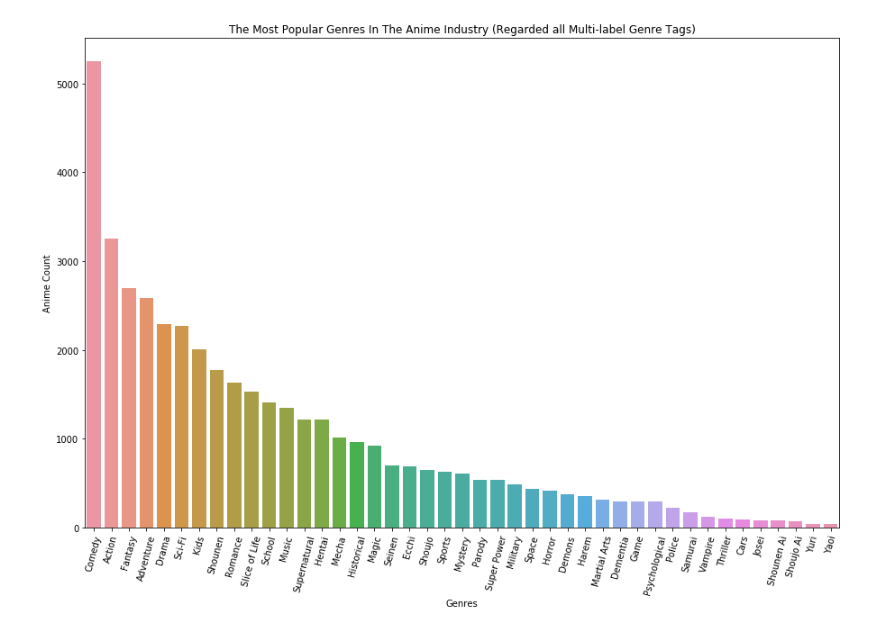


Photo taken from this notebook about the story of anime: https://www.kaggle.com/fatihbilgin/story-of-anime

You can see that the preferences of people reading manga or watching anime are a little different, anime is more inclined to fantasy, adventure and comedy, while manga is more focused in slice of life, withdrama and comedy. 


In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)